<a href="https://colab.research.google.com/github/ANDIECOOLER2/Transformers-and-Generative-Models-For-Visual-Tasks-Workshop/blob/main/Streaming_Copy_of_Transformers_and_Gen_AI_for_Vision_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Req

## References and Pre-requistes Walk Through

### Numpy and Python

### Pytorch and autograd

### Pytorch for computer vision

Dependencies

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(torch.__version__, torchvision.__version__)

2.6.0+cu124 0.21.0+cu124


#### 1. Getting a dataset
we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 119MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.79MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 61.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.06MB/s]


In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

##### 1.1 Input and Output Shapes of a Computer Vision Model

In [ ]:
image.shape #colour_channel,height, width

torch.Size([1, 28, 28])

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

10 different classes, it means our problem is **multi-class classification**.


Image shape: torch.Size([1, 28, 28]), image.squeeze() shape: torch.Size([28, 28])


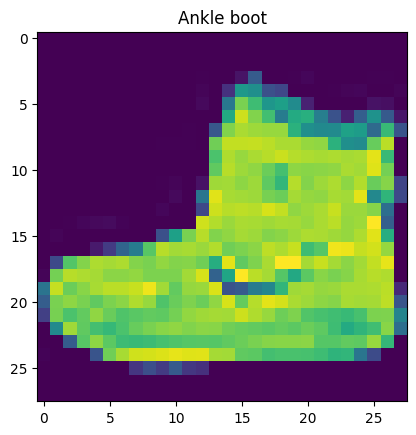

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}, image.squeeze() shape: {image.squeeze().shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label]);

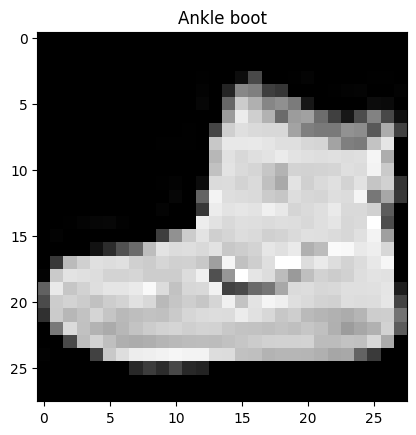

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

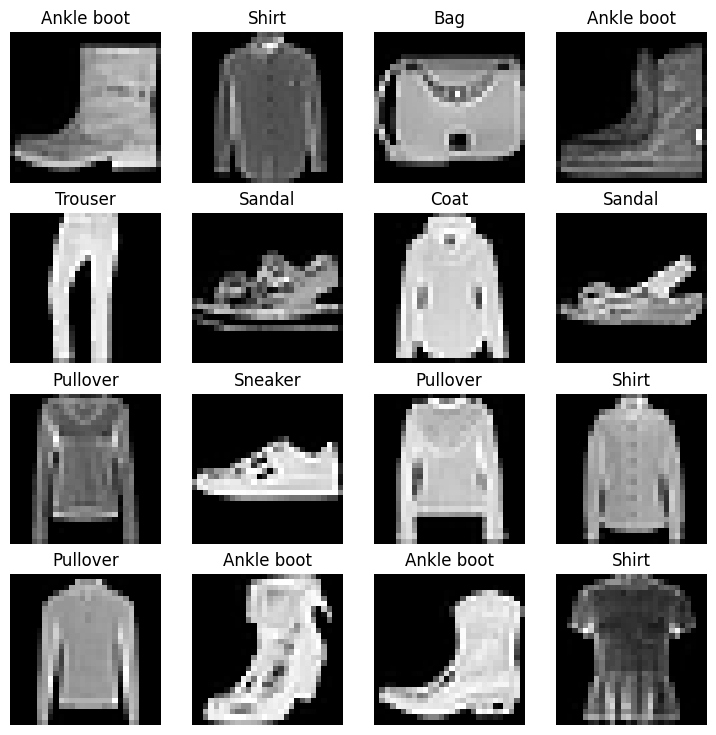

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

#### 2. Prepare the DataLoader

creata a dataloaders for out training set

In [ ]:
from torch.utils.data import DataLoader


In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)


In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e983c68cad0>, <torch.utils.data.dataloader.DataLoader object at 0x7e983c5df0d0>)


In [ ]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, Label size: torch.Size([])


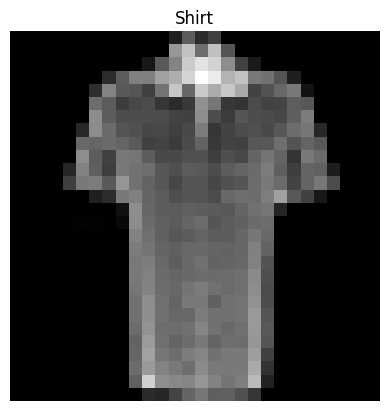

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

#### Model 0 : Building a Baseline Model

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape Before Flattening: {x.shape} --> [colour_channels, height, width]\nShape After Flattening: {output.shape} --> [colour_channels, height*width]")

Shape Before Flattening: torch.Size([1, 28, 28]) --> [colour_channels, height, width]
Shape After Flattening: torch.Size([1, 784]) --> [colour_channels, height*width]


In [ ]:
print(x)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [ ]:
print(output)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

##### 3.1 Setup loss, optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

##### 3.2 Creating a function to time our experiments

In [ ]:
from timeit import default_timer as Timer
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

##### 3.3 Creating a training loop and training a model on batcher of data

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

A fair few steps but...

...if in doubt, code it out.  
My Geniune Reponse: K BRO

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0

  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:

      test_pred = model_0(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss:{train_loss:.5f} | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% \n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_on_cpu, end=train_time_end_on_cpu, device="cpu")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.59039 | Test Loss: 0.50954 | Test acc: 82.04% 

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.47633 | Test Loss: 0.47989 | Test acc: 83.20% 

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.45503 | Test Loss: 0.47664 | Test acc: 83.43% 

Train time on cpu: 31.705 seconds


#### 4.Make Predictions and get Model Results
 let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    #scale the loss and accuracy to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return { "model_name": model.__class__.__name__,
          "model_loss": loss.item(),
           "model_acc": acc

        }

model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results




{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#### 5.Setup Device Agnostic-code (for GPU)

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 6. Model 1 : Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

##### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

##### 6.2 Functionalising training and test loops


In [ ]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)

  for batch , (X, y) in enumerate(data_loader):
    X , y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss:{train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss:{test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")






In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----------")
  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)
  test_step(data_loader = test_dataloader,
            model = model_1,
            accuracy_fn = accuracy_fn,
            loss_fn = loss_fn)
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----------
Train Loss:1.09199 | Train Accuracy: 61.34%
Test Loss:0.95636 | Test Accuracy: 65.00%
Train time on cpu: 10.232 seconds
Epoch: 1 
----------
Train Loss:0.78101 | Train Accuracy: 71.93%
Test Loss:0.72227 | Test Accuracy: 73.91%
Train time on cpu: 21.042 seconds
Epoch: 2 
----------
Train Loss:0.67027 | Train Accuracy: 75.94%
Test Loss:0.68500 | Test Accuracy: 75.02%
Train time on cpu: 31.851 seconds


In [ ]:
torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

The Above code should throw an error as the in eval_model, the tensors are not on the gpu, but since i have not activated the GPU it runs fine, but it must actually genreate an error


In [ ]:
#move values to the device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)

      acc+= accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
            "model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
  }



In [ ]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#### 7. Model 2: Building a Convolutional Neural Network(CNN)

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3 , padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    #print(x.shape)

    x = self.block_2(x)
    #print(x.shape)

    x = self.classifier(x)
    #print(x.shape)

    return x #here was the error, return X instead x lol



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#SANITY CHECK
my_model_arch = """FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)"""
author_model_arch = """FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)"""

Exploring the Layers

In [ ]:
images = torch.rand(size= (32, 3, 64, 64)) #[batch, colour channel, height, weight]
test_image = images[0] # get a single image
print(f"Image batch shape: {images.shape}")
print(f"Image shape:{test_image.shape}")

Image batch shape: torch.Size([32, 3, 64, 64])
Image shape:torch.Size([3, 64, 64])


Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d( in_channels = 3,
                       out_channels = 10,
                        kernel_size = 3 ,
                        stride = 1,
                        padding=0) #can use "valid" or "same

print(f"Test image shape before conv : {test_image.shape}")
print(f"Test image shape after conv : {conv_layer(test_image).shape}")

Test image shape before conv : torch.Size([3, 64, 64])
Test image shape after conv : torch.Size([10, 62, 62])


Changing the conv Layer

In [ ]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d( in_channels = 3,
                       out_channels = 10,
                        kernel_size = (5, 5),
                        padding = 0)

conv_layer_2(test_image.unsqueeze(dim=0)).shape, conv_layer(test_image).shape #(gives as a batch dim also, without squeeze and prev layer)

(torch.Size([1, 10, 60, 60]), torch.Size([10, 62, 62]))

For each out channel the shape is W = $R^{1 \times 60 \times 60} + $ bias $R^{1} (Scalar)$ I think lol. Yup this is wrong. This is the image i think


Or better yet lets check them out

In [ ]:
print(f"Conv_layer_2 weight shape:{conv_layer_2.weight.shape}")
print(f"Conv_layer_2 bias shape:{ conv_layer_2.bias.shape}")

Conv_layer_2 weight shape:torch.Size([10, 3, 5, 5])
Conv_layer_2 bias shape:torch.Size([10])


##### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
print(f"Test image shape:{test_image.shape}")
print(f"Test image with unsqueezed dimensions : {test_image.unsqueeze(dim=0).shape}")


Test image shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimensions : torch.Size([1, 3, 64, 64])


In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2) # half the width and height

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
test_image_through_conv.shape #also considers batch size

torch.Size([1, 10, 62, 62])

In [ ]:
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([1, 10, 31, 31])

Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will affect the size of the output shape.

In our case, the shape halves from a `62x62` image to `31x31` image.



Let's see this work with a smaller tensor.

In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=[1, 1, 2, 2])
random_tensor.shape, random_tensor

(torch.Size([1, 1, 2, 2]),
 tensor([[[[0.3367, 0.1288],
           [0.2345, 0.2303]]]]))

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2 )
max_pool_layer(random_tensor).shape, max_pool_layer(random_tensor)

(torch.Size([1, 1, 1, 1]), tensor([[[[0.3367]]]]))

Exercise

In [ ]:
avg_layer = nn.AvgPool2d(kernel_size=2)
avg_layer(random_tensor)

tensor([[[[0.2326]]]])

In [ ]:
random_tensor.sum()/4

tensor(0.2326)

##### 7.3 Setup a loss function and optimizer for the model_2

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.

In [ ]:
#Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1)

##### 7.5 Training and testing model_2 using our training and test fucntions

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):

        #print("FLAG 1 ")
        #print(X.shape, y.shape)

        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)
        #print("FLAG 2 ") model was returning wrong x lol
        #print(y_pred.shape)

        # 2. Calculate loss

        loss = loss_fn(y_pred, y)

        #print("FLAG 3 ")
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as Timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30229 | Train accuracy: 10.00%
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch: 1
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30231 | Test accuracy: 9.99%

Epoch: 2
---------
Train loss: 2.30228 | Train accuracy: 10.00%
Test loss: 2.30231 | Test accuracy: 9.99%

Train time on cpu: 203.176 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

#### 8. Compare model Train and test time


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,2.302306,9.994010


In [ ]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,31.704755
1,FashionMNISTModelV1,0.685001,75.019968,31.850935
2,FashionMNISTModelV2,2.302306,9.994010,203.176290


Why is v2Model so bad, same architecure, i did sanity check also

In [ ]:
def make_predictions(model: torch.nn.Module, data:list, device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      if len(sample.shape) == 3:
        sample = sample.unsqueeze(dim=0)
      sample = sample.to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) #pergorming soft max on the logits dimesions and not the batch dimesions

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)



In [ ]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
test_labels[0],class_names[test_labels[0]]

(5, 'Sandal')

In [ ]:
pred_probs = make_predictions(model=model_0, data=test_samples)

In [ ]:
pred_probs[0], pred_probs[0].shape,class_names[pred_probs[0].argmax()]

(tensor([4.4458e-08, 6.3134e-08, 3.4539e-08, 2.4900e-08, 2.0237e-08, 8.9550e-01,
         1.7275e-07, 1.6880e-03, 1.8719e-05, 1.0279e-01]),
 torch.Size([10]),
 'Sandal')

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

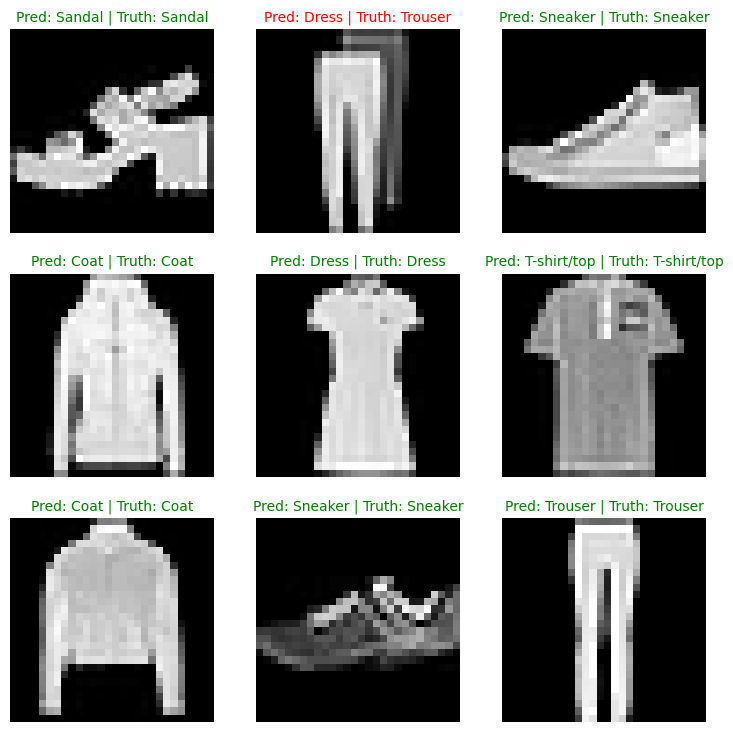

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

#### 10. Making a confusion Matrix for futher prediction evalution

Confuison matrix is used for classification

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):

    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)

NameError: name 'model_0' is not defined

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task = "multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

In [ ]:
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10, 7)
);

#### 11. Save and load best model

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = ".."
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print("SAVING MODEL TO :",MODEL_SAVE_PATH)

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH
        )

In [ ]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

# Whole Ahh Work through
From Pytorch to Gan
LEZZ GEDDIT DONE

## BASICS OF PYTORCH

### TENSOR SHIZZ

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.tensor([0 , 1, 2])
b = ((1.0, 1.1),(1.2, 1.3))
b = torch.tensor(b)

In [ ]:
c = np.ones([2, 3])
c = torch.tensor(c)

In [ ]:
print(f"a shape:{a.shape} \n b shape:{b.shape} \n c shape:{c.shape}")

a shape:torch.Size([3]) 
 b shape:torch.Size([2, 2]) 
 c shape:torch.Size([2, 3])


In [ ]:
x = torch.arange(0, 10)

print(x,"\n",x.shape)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
 torch.Size([10])


In [ ]:
x[:-1]

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
x[-1]

tensor(9)

In [ ]:
type(x[1:3]),x[1:3]

(torch.Tensor, tensor([1, 2]))

In [ ]:
#making a 5d tensor
x = torch.rand(1,2,3,4,5)
x[0].shape

torch.Size([2, 3, 4, 5])

In [ ]:
x[0] #[[[

tensor([[[[0.9678, 0.3461, 0.6795, 0.8651, 0.2575],
          [0.0642, 0.9667, 0.1785, 0.8490, 0.0748],
          [0.3895, 0.8317, 0.7975, 0.3301, 0.9499],
          [0.5774, 0.6692, 0.8518, 0.2645, 0.1589]],

         [[0.0284, 0.5191, 0.7590, 0.8424, 0.7650],
          [0.4141, 0.5314, 0.2899, 0.2454, 0.1461],
          [0.8673, 0.1037, 0.8690, 0.5277, 0.9421],
          [0.8111, 0.0787, 0.8062, 0.2059, 0.8636]],

         [[0.0030, 0.1793, 0.7829, 0.1128, 0.5375],
          [0.4993, 0.4459, 0.7372, 0.6808, 0.8897],
          [0.4455, 0.1515, 0.9394, 0.0912, 0.9976],
          [0.4801, 0.2944, 0.6575, 0.2658, 0.3833]]],


        [[[0.0163, 0.5911, 0.5080, 0.8405, 0.6970],
          [0.4088, 0.0234, 0.2216, 0.9352, 0.8402],
          [0.6659, 0.0051, 0.3741, 0.1105, 0.6929],
          [0.6038, 0.7780, 0.3704, 0.1303, 0.9743]],

         [[0.3934, 0.1140, 0.0486, 0.8174, 0.7023],
          [0.6708, 0.0735, 0.2149, 0.3856, 0.9611],
          [0.8427, 0.6856, 0.2068, 0.6125, 0.5483],
  

In [ ]:
x #[[[[

tensor([[[[[0.9678, 0.3461, 0.6795, 0.8651, 0.2575],
           [0.0642, 0.9667, 0.1785, 0.8490, 0.0748],
           [0.3895, 0.8317, 0.7975, 0.3301, 0.9499],
           [0.5774, 0.6692, 0.8518, 0.2645, 0.1589]],

          [[0.0284, 0.5191, 0.7590, 0.8424, 0.7650],
           [0.4141, 0.5314, 0.2899, 0.2454, 0.1461],
           [0.8673, 0.1037, 0.8690, 0.5277, 0.9421],
           [0.8111, 0.0787, 0.8062, 0.2059, 0.8636]],

          [[0.0030, 0.1793, 0.7829, 0.1128, 0.5375],
           [0.4993, 0.4459, 0.7372, 0.6808, 0.8897],
           [0.4455, 0.1515, 0.9394, 0.0912, 0.9976],
           [0.4801, 0.2944, 0.6575, 0.2658, 0.3833]]],


         [[[0.0163, 0.5911, 0.5080, 0.8405, 0.6970],
           [0.4088, 0.0234, 0.2216, 0.9352, 0.8402],
           [0.6659, 0.0051, 0.3741, 0.1105, 0.6929],
           [0.6038, 0.7780, 0.3704, 0.1303, 0.9743]],

          [[0.3934, 0.1140, 0.0486, 0.8174, 0.7023],
           [0.6708, 0.0735, 0.2149, 0.3856, 0.9611],
           [0.8427, 0.6856, 0.2068, 

In [ ]:
print(x.shape)
print(f" shape of x[0]:{x[0].shape}")
print(f" shape of x[0][0]:{x[0][0].shape}")
print(f" shape of x[0][0][0]:{x[0][0][0].shape}")

torch.Size([1, 2, 3, 4, 5])
 shape of x[0]:torch.Size([2, 3, 4, 5])
 shape of x[0][0]:torch.Size([3, 4, 5])
 shape of x[0][0][0]:torch.Size([4, 5])


In [ ]:
x = torch.rand(10) # uniform 0-1
x

tensor([0.3948, 0.3348, 0.8817, 0.3637, 0.4562, 0.8510, 0.5982, 0.4254, 0.0262,
        0.9535])

In [ ]:
x = torch.randn(10) # Returns a tensor filled with random numbers from a normal distribution with mean `0` and variance `1

x

tensor([-1.2722,  1.4214, -0.4945, -1.9372, -1.3647,  1.5925, -0.5019,  1.3605,
        -0.4278,  1.1629])

In [ ]:
x.device

device(type='cpu')

LEtS GET a GpU BrOKE BoIIS

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [ ]:
x = x.to(device) # cant just say x.to(device)
x.device

device(type='cuda', index=0)

In [ ]:
GPU_DEVICE = "cuda"

x = torch.randn(2,2, device = GPU_DEVICE)
print(x.dtype)
print(x.device)

torch.float32
cuda:0


In [ ]:
y = torch.rand(2, 2)
print(f"y before calling to() | device: {y.device} | dtype: {y.dtype}")
y = y.to(device)
print(f"y after calling to() | device: {y.device} | dtype: {y.dtype}") #indexed at first gpu i think


y before calling to() | device: cpu | dtype: torch.float32
y after calling to() | device: cuda:0 | dtype: torch.float32


In [ ]:
 (y.device.index) #device index

0

In [ ]:
x = torch.tensor([0, 1, 2], device = GPU_DEVICE)
y = torch.tensor([3, 4, 5], device = "cpu")
z = torch.tensor([6, 7, 8], device = GPU_DEVICE)

In [ ]:
try:
  x + y
except Exception as e:
  print(e,"\n BASICALLY all devices should be on same device")

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! 
 BASICALLY all devices should be on same device


In [ ]:
x+z # no problem

tensor([ 6,  8, 10], device='cuda:0')

In [ ]:
y = y.to(GPU_DEVICE)
(x+y)

tensor([3, 5, 7], device='cuda:0')

### Pytorch AUTOGRAD shizz

#### Building a simple computation graph

In [ ]:
class SimpleGraph:
  def __init__(self, w, b):
    assert isinstance(w, float)
    assert isinstance(b, float)

    self.w = torch.tensor([w], requires_grad=True)
    self.b = torch.tensor([b], requires_grad=True)

  def forward(self, x):
    assert isinstance(x, torch.Tensor) #GOMMA FULL SANITY CHECKS

    prediction = torch.tanh(x * self.w + self.b)
    return prediction

def sq_loss(y_true, y_prediction):
  loss = (y_true - y_prediction)**2 # loss_fn = torch.nn.MSELoss() , loss_fn(y_true, y_pred)*torch.tensor(len(y_prediction)) # I think
  return loss

feature = torch.tensor([1]) #Input Tensor
target = torch.tensor([7]) # Target Tensor
simple_graph = SimpleGraph(-0.5, 0.5)



In [ ]:
simple_graph.w, simple_graph.b

(tensor([-0.5000], requires_grad=True), tensor([0.5000], requires_grad=True))

In [ ]:
simple_graph.w.item(), simple_graph.b.item()

(-0.5, 0.5)

In [ ]:
#WHAT DOES ITEM DO?
torch.tensor(([1,2,3],[1,3,4])).sum().item() #items gives scalar

14

In [ ]:
prediction = simple_graph.forward(feature)
prediction

tensor([0.], grad_fn=<TanhBackward0>)

In [ ]:
torch.tanh(torch.tensor(1*(-0.5) + 0.5))

tensor(0.)

In [ ]:
square_loss = sq_loss(target, prediction)
square_loss

tensor([49.], grad_fn=<PowBackward0>)

In [ ]:
simple_graph.w.grad, simple_graph.b.grad

(None, None)

In [ ]:
square_loss.backward() #cannot run this a second time unless you put retain_grad or something and or you re-intialize everything

In [ ]:
simple_graph.w.grad, simple_graph.b.grad

(tensor([-14.]), tensor([-14.]))

#### Backward Propogation

In [ ]:
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([-1.0],  requires_grad=True)
c = a + b
c.grad_fn

In [ ]:
c = a*b

In [ ]:
c.grad_fn

In [ ]:
prediction.grad_fn

In [ ]:
square_loss.grad_fn

tf is this 🫵🏽🔥
```
Hello I love You
x1 x2 x3 x4
Linear Transformation
Q = [q1, q2, q3, q4]
K = [k1,k2,k3,k4]
V = [v1,v2,v3,v4]


Attention
Softmax(q2.T@[k1,k2,k3,k4]/sqrt(d)) = [0.2,0.4,0.1,0.3]

0.2*v1 + 0.4 *v2 + ....

\hat{x1} \hat{x2} ...
Different W_Q, W_K and W_V

W_O



Ajay went to a Blood bank today and donated 5 ltrs of blood
Ajay went to a bank today to deposit 5 lac money to his friends account
```

### Tranformers

![](https://theaisummer.com/static/6122618d7e1466853e88473ba375cdc7/40ffe/transformer.png)


#### 1. Introduction

We will explain the try to implement transformers in "Attention is all you need paper" from scratch using Pytorch. Basically transformer have an encoder-decoder architecture. It is common for language translation models.



Note: Here we are  not going to a indepth explaination of transformers. For that please refer [blog](http://jalammar.github.io/illustrated-transformer/.) by Jay alammar. He has given a indepth explanation about the inner working of the transformers. We will just focus on the coding part.


In [ ]:
!pip install torchtext

###### Imports

In [ ]:
 import torch.nn as nn
 import torch
 import torch.functional as F
 import math, copy, re
 import warnings
 #Q: #What is common betwwen poachers in china and data scientists?
 #Ans: import pandas as pd

 import numpy as np
 import seaborn as sns

 import matplotlib.pyplot as plt
 warnings.simplefilter("ignore")
 print(torch.__version__)

2.6.0+cu124


###### Basic Components

######Create Word Embeddings

In [ ]:
x = [[1, 2, 0]]
x = np.array([[0,1,0],[0,0,1],[1,0,0]])
W = np.array([[0.1,0.2],[0.5,0.4],[1.2,1.3]])
print(W.shape, x.shape)

x@W

(3, 2) (3, 3)


array([[0.5, 0.4],
       [1.2, 1.3],
       [0.1, 0.2]])

In [ ]:
class Embedding(nn.Module):
  def __init__(self, vocab_size, embed_dim):

    super(Embedding, self).__init__()
    self.embed = nn.Embedding(vocab_size, embed_dim) #shape vocab x embed_dim

  def forward(self, x):
    out = self.embed(x)

    return out


###### Postional Encoding


Next step is to generate positional encoding. Inorder for the model to make
sense of the sentence, it needs to know two things about the each word.
* what does the word mean?
* what is the position of the word in the sentence.

In "attention is all you need paper" author used the following functions to create positional encoding. On odd time steps a cosine function is used and in even time steps a sine function is used.

![](https://miro.medium.com/max/524/1*yWGV9ck-0ltfV2wscUeo7Q.png)

![](https://miro.medium.com/max/564/1*SgNlyFaHH8ljBbpCupDhSQ.png)

```
pos -> refers to order in the sentence
i -> refers to position along embedding vector dimension
```

Positinal embedding will generate a matrix of similar to embedding matrix. It will create a matrix of dimension sequence length x embedding dimension. For each token(word) in sequence, we will find the embedding vector which is of dimension 1 x 512 and it is added with the correspondng positional vector which is of dimension 1 x 512 to get 1 x 512 dim out for each word/token.

for eg: if we have batch size of 32 and seq length of 10 and let embedding dimension be 512. Then we will have embedding vector of dimension 32 x 10 x 512. Similarly we will have positional encoding vector of dimension 32 x 10 x 512. Then we add both.
![](https://miro.medium.com/max/906/1*B-VR6R5vJl3Y7jbMNf5Fpw.png)

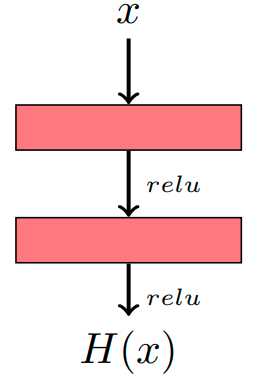



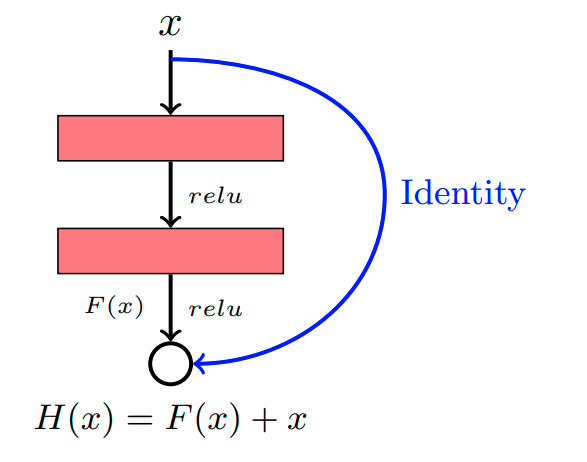


*  a deeper version of a shallow network would do just fine by learning identity
transformations in the new layers

*  This identity connection from the input allows a ResNet to retain a copy
of the input

*  Using this idea they were able to train
really deep networks

In [ ]:
# register buffer in Pytorch ->
# If you have parameters in your model, which should be saved and restored in the state_dict,
# but not trained by the optimizer, you should register them as buffers.

In [ ]:
# class PostionalEmbedding(nn.Module):
#   def __init__(self, embed_model_dim, max_seq_len):
#     super(PostionalEmbedding, self).__init__()
#     self.embed_dim = embed_model_dim

#     pe = torch.zeros(max_seq_len, self.embed_dim)
#     for pos in range(max_seq_len):
#       for i in range(0, self.embed_dim,2):
#         pe[pos, i] = math.sin(pos/(10000 ** ((2*i)/self.embed_dim)))
#         pe[pos, i+1] = math.cos(pos/(10000 ** ((2*(i+1))/self.embed_dim)))

#     pe = pe.unsqueeze(0)
#     self.register_buffer("pe", pe)

#   def forward(self, x):
#     x = x*math.sqrt(self.embed_dim)

#     seq_len = x.size(1)
#     print(f"X.shape in postional Encodings: {x.shape}" )
#     print(f"added postional encodings shape {(torch.autograd.Variable(self.pe[:,:seq_len], requires_grad=False)).shape}" )
#     print(f"pe.shape:{self.pe.shape}")
#     x = x + torch.autograd.Variable(self.pe[:,:seq_len,:], requires_grad=False)

#     return x

class PositionalEmbedding(nn.Module):
    def __init__(self,max_seq_len,embed_model_dim):
        """
        Args:
            seq_len: length of input sequence
            embed_model_dim: demension of embedding
        """
        super(PositionalEmbedding, self).__init__()
        self.embed_dim = embed_model_dim

        pe = torch.zeros(max_seq_len,self.embed_dim)
        for pos in range(max_seq_len):
            for i in range(0,self.embed_dim,2):
                pe[pos, i] = math.sin(pos / (10000 ** ((2 * i)/self.embed_dim)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1))/self.embed_dim)))
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)


    def forward(self, x):
        """
        Args:
            x: input vector
        Returns:
            x: output
        """

        # make embeddings relatively larger
        x = x * math.sqrt(self.embed_dim)
        #add constant to embedding
        seq_len = x.size(1)
        x = x + torch.autograd.Variable(self.pe[:,:seq_len], requires_grad=False)
        return x







![](https://miro.medium.com/max/524/1*yWGV9ck-0ltfV2wscUeo7Q.png)

![](https://miro.medium.com/max/564/1*SgNlyFaHH8ljBbpCupDhSQ.png)

```
pos -> refers to order in the sentence
i -> refers to position along embedding vector dimension
```

In [ ]:
# max_seq_len = 100
# embed_dim = 40
# pe = torch.zeros(max_seq_len,embed_dim)
# for pos in range(max_seq_len):
#   for i in range(0, embed_dim,2):
#     pe[pos, i] = math.sin(pos/(10000 ** ((2*i)/embed_dim)))
#     pe[pos, i+1] = math.cos(pos/(10000 ** ((2*i)/embed_dim)))

# pe.shape
# pe = pe.unsqueeze(0)
# pe.shape

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

##### Self Attention

Let me give a glimpse on Self Attention and Multihead attention

***What is self attention?***

Suppose we have a sentence "Dog is crossing the street because it saw the kitchen".What does <**it**> refers to here? It's easy to understand for the humans that it is Dog. But not for the machines.

As model proceeses each word, self attention allows it to look at other positions in the input sequence for clues. It will creates a vector based on dependency of each word with the other.


Let us go through a step by step illustration of self attention.

* **Step 1:** The first step in calculating self-attention is to create three vectors from each of the encoder’s input vectors (in this case, the embedding of each word). So for each word, we create a Query vector, a Key vector, and a Value vector. Each of the vector will be of dimension 1x64.

Since we have a multihead attention we will have 8 self attention heads.I will explain the code with 8 attention head in mind.

**How key,queries and values can be created?**

We will have a key matrix,query matrix and a value matrix to generate key, query and value.
These matrixes are learned during training.

```
code hint:
Suppose we have batch_size=32,sequence_length=10, embedding dimension=512. So after embedding and positional encoding our output will be of dimension 32x10x512.
We will resize it to 32x10x8x16.(About 8, it is the number of heads in multihead attention.Dont worry you will get to know about it once you go through the code.).

```


* **Step 2:**  Second step is to calculate the score. ie, we will multiply query marix with key matrix. [Q x K.t]

```
code hint:
Suppose our key,query and value dimension be 32x10x8x64. Before proceeding further, we will transpose each of them for multiplication convinience (32x8x10x64). Now multiply query matrix with transpose key matrix. ie (32x8x10x64) x (32x8x64x10) -> (32x8x10x10).
```


* **Step 3:** Now divide the output matrix with square root of dimension of key matrix and then apply Softmax over it.

```
code hint: we will divide 32x8x10x10 vector by 8 ie, by square root of 64 (dimension of key matrix)
```


* **Step 4:** Then this gets multiply it with value matrix.

```
code hint:
After step 3 our output will be of dimension 32x8x10x10. Now muliply it with value matrix (32x8x10x64) to get output of dimension (32x8x10x64).Here 8 is the number of attention heads and 10 is the sequence length.Thus for each word we have 64 dim vector.
```

* **Step 5:** Once we have this we will pass this through a linear layer. This forms the output of multihead attention.

```
code hint:
(32x8x10x64) vector gets transposed to (32x10x8x64) and then reshaped as (32x10x512).Then it is passed through a linear layer to get output of (32x10x512).
```


Now you got an idea on how multihead attention works. You will be more clear once you go through the implementation part of it.

```
Thank you SIREE
```

```
Input x:            (32, 10, 512)
↓ Linear layers
Q, K, V:            (32, 10, 512)
↓ Reshape
Q, K, V:            (32, 10, 8, 64)
↓ Permute
Q, K, V:            (32, 8, 10, 64)
↓ Permute K
K:                  (32, 8, 64, 10)
↓
Scaled dot-product attention (per head)
↓ Concatenate heads

Concat output:      (32, 10, 512)
↓ Final linear layer
Final output:       (32, 10, 512)
```

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, embed_dim = 512, n_heads = 8):

    super(MultiHeadAttention, self).__init__()

    self.embed_dim = embed_dim
    self.n_heads = n_heads
    self.single_head_dim = int(self.embed_dim / self.n_heads) #512/8 = 64  | each key,query, value will be of 64d

    #key, query, value matrixes
    self.query_matrix = nn.Linear(self.single_head_dim, self.single_head_dim, bias = False)
    self.key_matrix = nn.Linear(self.single_head_dim, self.single_head_dim, bias=False)
    self.value_matrix = nn.Linear(self.single_head_dim, self.single_head_dim, bias = False)
    self.out = nn.Linear(self.n_heads*self.single_head_dim, self.embed_dim)

  def forward(self,key,query,value,mask=None):

    batch_size = key.size(0)
    seq_length = key.size(1)

    seq_length_query = query.size(1)

    #32x10x512

    #STEP 1

    key = key.view(batch_size, seq_length, self.n_heads, self.single_head_dim ) #32x10x512 -- > (32x10x8x64)
    query = query.view(batch_size, seq_length, self.n_heads, self.single_head_dim)
    key = key.view(batch_size, seq_length, self.n_heads, self.single_head_dim)

    k = self.key_matrix(key)

    q = self.query_matrix(query)

    v = self.value_matrix(value)

    k = k.transpose(1,2) #(32x10x8x64) --> (32x8x10x64)
    q = q.transpose(1,2) #(32x10x8x64) --> (32x8x10x64)
    v = v.transpose(1,2) #(32x10x8x64) --> (32x8x10x64)

    k_adjusted = k.transpose(-1, 2) #(32x10x8x64) --> (32x8x64x10)
    product = torch.matmul(q, k_adjusted)   #(32 x 8 x 10 x 64) x (32 x 8 x 64 x 10) = #(32x8x10x10)

    # fill those positions of product matrix as (-1e20) where mask positions are 0
    if mask is not None:
      product = product.masked_fill(mask==0, float("-1e20"))

    """
    #STEP 3 #<DOUBT>: Why are we using math. package when we can use torch. package
    #        <WHY>: at the backend, computationally more expensive as it has to map these python fucntions to torch
    #               functions to add to the computation graph
    """
    product = product / math.sqrt(self.single_head_dim)

    scores = F.softmax(product, dim = 1)

    #STEP 4
    scores = torch.matmul(scores, v)  ##(32x8x10x10) x (32x8x10x64) --> (32x8x10x64)

    concat = scores.transpose(1, 2).contiguous().view(batch_size, seq_length_query, self.single_head_dim*self.n_heads) #(32x8x10x64) -> (32x10x8x64)  -> (32,10,512)

    output = self.out(concat) # self.out = nn.Linear(self.n_heads*self.single_head_dim ,self.embed_dim) #(32,10,512) -> (32,10,512)

    return output












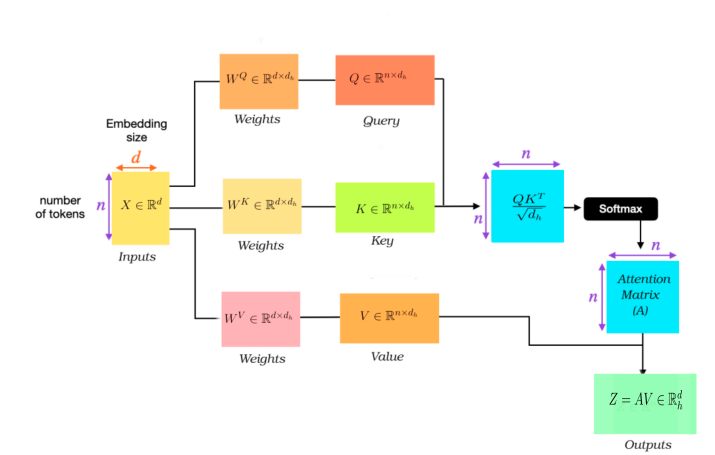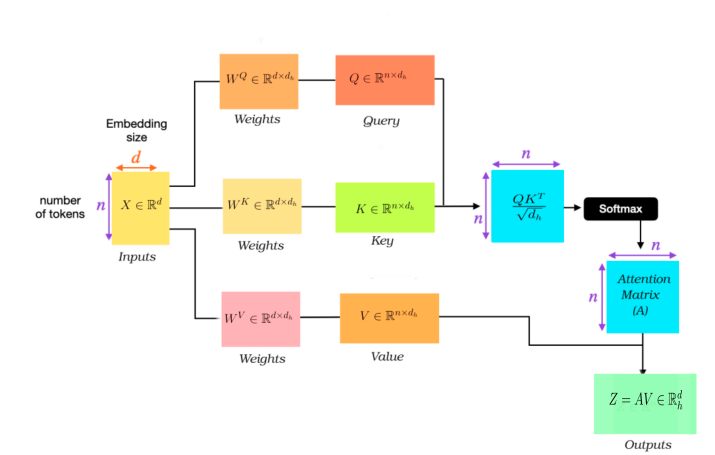

###### Encoder




<img src="https://www.researchgate.net/profile/Ehsan-Amjadian/publication/352239001/figure/fig1/AS:1033334390013952@1623377525434/Detailed-view-of-a-transformer-encoder-block-It-first-passes-the-input-through-an.jpg" width=300 height=600>



In the encoder section -

**Step 1:** First input(padded tokens corresponding to the sentence) get passes through embedding layer and positional encoding layer.

```
code hint
suppose we have input of 32x10 (batch size=32 and sequence length=10). Once it passes through embedding layer it becomes 32x10x512. Then it gets added with correspondng positional encoding vector and produces output of 32x10x512. This gets passed to the multihead attention
```

**Step 2:** As discussed above it will passed through the multihead attention layer and creates useful representational matrix as output.

```
code hint
input to multihead attention will be a 32x10x512 from which key,query and value vectors are generated as above and finally produces a 32x10x512 output.
```

**Step 3:** Next we have a normalization and residual connection. The output from multihead attention is added with its input and then normalized.

```
code hint
output of multihead attention which is 32x10x512 gets added with 32x10x512 input(which is output created by embedding vector) and then the layer is normalized.

```

**Step 4:** Next we have a feed forward layer and a then normalization layer with residual connection from input(input of feed forward layer) where we passes the output after normalization though it and finally gets the output of encoder.

```
code hint
The normalized output will be of dimension 32x10x512. This gets passed through 2 linear layers: 32x10x512 -> 32x10x2048 -> 32x10x512. Finally we have a residual connection which gets added with the output and the layer is normalized. Thus a 32x10x512 dimensional vector is created as output for the encoder.

```

In [ ]:
class TransformerBlock(nn.Module):
  def __init__(self, embed_dim, expansion_factor=4, n_heads=8):
    super(TransformerBlock, self).__init__()

    self.attention = MultiHeadAttention(embed_dim, n_heads)

    self.norm1 = nn.LayerNorm(embed_dim)
    self.norm2 = nn.LayerNorm(embed_dim)

    self.feed_forward = nn.Sequential(
        nn.Linear(embed_dim, expansion_factor*embed_dim),
        nn.ReLU(),
        nn.Linear(expansion_factor*embed_dim, embed_dim)
        #no activaiton?
        )

    self.dropout1 = nn.Dropout(0.2)
    self.dropout = nn.Dropout(0.2)

  def forward(self, key, query, value):
    attention_out = self.attention(key, query, value)
    attention_residual_out = attention_out + value
    norm1_out = self.dropout1(self.norm1(attention_residual_out))

    feed_fwd_out = self.feed_forward(norm1_out)
    feed_fwd_residual_out = feed_fwd_out + norm1_out

    norm2_out = self.dropout2(self.norm2(feed_fwd_residual_out))

    return norm2_out

class TransformerEncoder(nn.Module):
  def __init__(self, seq_len, vocab_size, embed_dim, num_layers=2, expansion_factor=4, n_heads=8):
    super(TransformerEncoder, self).__init__()

    self.embedding_layer = Embedding(vocab_size, embed_dim)

    self.postional_encoder = PositionalEmbedding(seq_len, embed_dim)

    self.layers = nn.ModuleList([TransformerBlock(embed_dim, expansion_factor, n_heads) for i in range(num_layers)])


  def forward(self, x):
    embed_out = self.embedding_layer(x)
    out = self.postional_encoder(embed_out)

    for layer in self.layers:
      out = layer(out,out,out)

    return out


###### Decoder



![](https://discuss.pytorch.org/uploads/default/optimized/3X/8/e/8e5d039948b8970e6b25395cb207febc82ba320a_2_177x500.png)


Now we have gone through most parts of the encoder.Let us get in to the components of the decoder. We will use the output of encoder to generate key and query vectors for the decoder.There are two kinds of multi head attention in the decoder.One is the decoder attention and other is the encoder decoder attention. Don't worry we will go step by step.

Let us explain with respect to the training phase. Firt

**Step 1:**

First the output  gets passed through the embeddin and positional encoding to create a embedding vector of dimension 1x512 corresponding to each word in the target sequence.

```
code hint
Suppose we have a sequence length of 10. batch size of 32 and embedding vector dimension of 512. we have input of size 32x10 to the embedding matrix which produces and output of dimension 32x10x512 which gets added with the positional encoding of same dimension and produces a 32x10x512 out

```

**Step 2:**

The embeddig output gets passed through a multihead attention layers as before(creating key,query and value matrixes from the target input) and produces an output vector. This time the major difference is that we uses a mask with multihead attention.

**Why mask?**

Mask is used because while creating attention of target words, we donot need a word to look in to the future words to check the dependency. ie, we already learned that why we create attention because we need to know contribution of each word with the other word. Since we are creating attention for words in target sequnce, we donot need a particular word to see the future words. For eg: in word "I am a strudent", we donot need the word "a" to look word "student".


```
code hint
For creating attention we created a triangular matrix with 1 and 0.eg:traingular matrix for seq length 5 looks as below:

1 0 0 0 0
1 1 0 0 0
1 1 1 0 0
1 1 1 1 0
1 1 1 1 1

After the key gets multiplied with query, we fill all zero positions with negative inifinity, In code we will fill it with a very small number to avoid division errors.
(with -1e 20)


```

**Step 3:**

As before we have a add and norm layer where we add with output of embedding with attention out and normalized it.


**Step 4:**


<CLS> Next we have another <Blank/Mask> attention and then a add and norm layer. This multihead attention is called encoder-decorder <Blank/Mask> attention. For this multihead attention we create we create key and value <Blank/Mask> from the encoder output. Query is created from the output of previous decoder layer. Next Sentence Prediction (NSP), Masked Language Modelling

```
code hint:
Thus we have 32x10x512 out from encoder out. key and value for all words are generated from it. Similary query matrix is generated from otput from previous layer of decoder(32x10x512).

```

Thus it is passed through a multihead atention (we used number of heads = 8) the through a Add and Norm layer. Here the output from previous encoder layer(ie previoud add and norm layer) gets added with encoder-decoder attention output and then normalized.

**Step 5:**
Next we have a feed forward layer(linear layer) with add and nom which is similar to that of present in the encoder.


**Step 6:**
Finally we create a linear layer with length equal to number of words in total target corpus and a softmax function with it to get probablity of each word.

In [ ]:
class DecoderBlock(nn.Module):
  def __init__(self, embed_dim, expansion_factor=4, n_heads=8):
    super(DecoderBlock, self).__init__()

    self.attention = MultiHeadAttention(embed_dim, n_heads=8)
    self.norm = nn.LayerNorm(embed_dim)
    self.dropout = nn.Dropout(0.2)
    self.transformer_block = TransformerBlock(embed_dim, expansion_factor, n_heads)

  def forward(self, key, query, x, mask):
    attention = self.attention(x, x, x, mask=mask)
    value = self.dropout(self.norm(attention + x))

    out = self.transformer_block(key, query, value)

    return out

class TransformerDecoder(nn.Module):
    def __init__(self, target_vocab_size, embed_dim, seq_len, num_layers=2, expansion_factor=4, n_heads=8):
      super(TransformerDecoder, self).__init__()

      self.word_embedding = nn.Embedding(target_vocab_size, embed_dim)
      self.postion_embedding = PositionalEmbedding(seq_len, embed_dim)

      self.layers = nn.ModuleList(
          [
              DecoderBlock(embed_dim, expansion_factor=4, n_heads=8) for _ in range(num_layers)
          ]
      )
      self.fc_out = nn.Linear(embed_dim, target_vocab_size)
      self.dropout = nn.Dropout(0.2)

    def forward(self, x, enc_out, mask):

        """
        Args:
            x: input vector from target
            enc_out : output from encoder layer
            mask: mask for decoder self attention
        Returns:
            out: output vector
        """

        x = self.word_embedding(x)
        x = self.postion_embedding(X) #we don;t add it to word_embeddings?
        x = self.dropout(x)

        for layer in self.layers:
          x = layer(enc_out, x, enc_out, mask)
        out = F.softmax(self.fc_out(x))

        return out






In [ ]:
class Transformer(nn.Module):
  def __init__(self, embed_dim, src_vocab_size, target_vocab_size, seq_length, num_layers = 2, expansion_factor=4, n_heads=8):
        super(Transformer, self).__init__()
        """
        Args:
           embed_dim:  dimension of embedding
           src_vocab_size: vocabulary size of source
           target_vocab_size: vocabulary size of target
           seq_length : length of input sequence
           num_layers: number of encoder layers
           expansion_factor: factor which determines number of linear layers in feed forward layer
           n_heads: number of heads in multihead attention

        """

        self.target_vocab_size = target_vocab_size
        self.encoder = TransformerEncoder(seq_length, src_vocab_size, embed_dim, num_layers=num_layers, expansion_factor=expansion_factor, n_heads=n_heads)
        self.decoder = TransformerDecoder(target_vocab_size, embed_dim, seq_length, num_layers=num_layers, expansion_factor=expansion_factor, n_heads=n_heads)

  def make_trg_mask(self,trg):
        batch_size, trg_len = trg.shape

        trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand( batch_size, 1, trg_len, trg_len)
        return trg_mask

  def decode(self, src, trg):
    trg_mask = self.make_trg_mask(trg)
    enc_out = self.encoder(src)
    out_labels = []
    batch_size, seq_len = src.shape[0], src.shape[1]

    out = trg

    for i in range(seq_len): #10
      out = self.decoder(out, enc_out, trg_mask) # batch x seq_len x vocabdim
      out = out[:, -1, :]
      out = out.argmax(-1)
      out_labels.append(out.item())
      out = torch.unsqueeze(out, axis = 0 )

    return out_labels

  def forward(self, src, trg):
    trg_mask = self.make_trg_mask(trg)
    enc_out = self.encoder(src)

    outputs = self.decoder(trg, enc_out, trg_mask)
    return outputs


In [ ]:
src_vocab_size = 11
target_vocab_size = 11
num_layers = 6
seq_length= 12


# let 0 be sos token and 1 be eos token
src = torch.tensor([[0, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, 1],
                    [0, 2, 8, 7, 3, 4, 5, 6, 7, 2, 10, 1]])
target = torch.tensor([[0, 1, 7, 4, 3, 5, 9, 2, 8, 10, 9, 1],
                       [0, 1, 5, 6, 2, 4, 7, 6, 2, 8, 10, 1]])

print(src.shape,target.shape)
model = Transformer(embed_dim=512, src_vocab_size=src_vocab_size,
                    target_vocab_size=target_vocab_size, seq_length=seq_length,
                    num_layers=num_layers, expansion_factor=4, n_heads=8)
model

torch.Size([2, 12]) torch.Size([2, 12])


Transformer(
  (encoder): TransformerEncoder(
    (embedding_layer): Embedding(
      (embed): Embedding(11, 512)
    )
    (postional_encoder): PositionalEmbedding()
    (layers): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadAttention(
          (query_matrix): Linear(in_features=64, out_features=64, bias=False)
          (key_matrix): Linear(in_features=64, out_features=64, bias=False)
          (value_matrix): Linear(in_features=64, out_features=64, bias=False)
          (out): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (feed_forward): Sequential(
          (0): Linear(in_features=512, out_features=2048, bias=True)
          (1): ReLU()
          (2): Linear(in_features=2048, out_features=512, bias=True)
        )
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout): Dr

In [ ]:
print(f"src.shape:{src.shape}, Target.shape:{target.shape}")
out = model(src, target)
out.shape

src.shape:torch.Size([2, 12]), Target.shape:torch.Size([2, 12])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (24x512 and 64x64)

### Vision Transformer

Let’s dive into this Vision Transformer (ViT) implementation in PyTorch, breaking it down step-by-step to ensure you understand every component thoroughly for your exam or workshop. The code implements a ViT model tailored for the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0-9). The ViT architecture is adapted from the original Transformer model, traditionally used in NLP, to process images by treating them as sequences of patches. Below, I’ll explain the code’s structure, key components, and their roles in detail.

---

### **Overview of Vision Transformer (ViT)**

The Vision Transformer (ViT) is a model that applies the Transformer architecture to image classification tasks. Instead of using convolutional neural networks (CNNs), ViT divides an image into fixed-size patches, flattens these patches into vectors, and processes them as a sequence of tokens, similar to words in NLP. These tokens are fed into a Transformer encoder, which uses self-attention to capture relationships between patches, followed by a classification head to predict the output class.

The provided code implements a lightweight ViT for MNIST, with the following key components:
1. **Patchification**: Dividing images into patches.
2. **Patch Embedding**: Mapping patches to a fixed-dimensional space.
3. **Positional Encoding**: Adding positional information to patches.
4. **Transformer Encoder Blocks**: Applying self-attention and feed-forward layers.
5. **Classification Head**: Predicting the digit class.

---

### **Code Structure**

The code is organized into several key functions and classes:
- **Utility Functions**:
  - `patchify`: Converts images into a sequence of flattened patches.
  - `get_positional_embeddings`: Generates sinusoidal positional embeddings for patches.
- **Model Components**:
  - `MyMSA`: Multi-Head Self-Attention module.
  - `MyViTBlock`: Transformer encoder block combining attention and MLP.
  - `MyViT`: The complete ViT model.
- **Main Function**: Handles data loading, model training, and evaluation.

Let’s break down each part.

---

### **1. Patchification (`patchify`)**

```python
def patchify(images, n_patches):
    n, c, h, w = images.shape
    assert h == w, "Patchify method is implemented for square images only"
    patches = torch.zeros(n, n_patches**2, h * w * c // n_patches**2)
    patch_size = h // n_patches
    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[
                    :, i * patch_size : (i + 1) * patch_size, j * patch_size : (j + 1) * patch_size,
                ]
                patches[idx, i * n_patches + j] = patch.flatten()
    return patches
```

**Purpose**: This function divides an input image into a grid of non-overlapping patches and flattens each patch into a vector.

**Details**:
- **Input**: A batch of images with shape `(n, c, h, w)`, where:
  - `n`: Batch size (number of images).
  - `c`: Number of channels (1 for MNIST grayscale).
  - `h, w`: Height and width (28x28 for MNIST).
- **Parameters**:
  - `n_patches`: Number of patches per dimension (e.g., `n_patches=7` creates a 7x7 grid, yielding 49 patches).
- **Process**:
  - Ensures the image is square (`h == w`).
  - Computes `patch_size = h // n_patches` (e.g., 28 ÷ 7 = 4 pixels per patch).
  - For each image, extracts patches of size `(c, patch_size, patch_size)` (e.g., 1x4x4 for MNIST).
  - Flattens each patch into a vector of length `c * patch_size * patch_size` (e.g., 1x4x4 = 16).
  - Stores patches in a tensor of shape `(n, n_patches**2, patch_dim)`, where `patch_dim = c * h * w // n_patches**2`.
- **Output**: A tensor of shape `(n, 49, 16)` for MNIST with `n_patches=7`.

**Why**: ViT treats images as sequences of patches, analogous to tokens in NLP. This function prepares the input for the Transformer by converting 2D images into a 1D sequence of patch vectors.

---

### **2. Multi-Head Self-Attention (`MyMSA`)**

```python
class MyMSA(nn.Module):
    def __init__(self, d, n_heads=2):
        super(MyMSA, self).__init__()
        self.d = d
        self.n_heads = n_heads
        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"
        d_head = int(d / n_heads)
        self.q_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.d_head = d_head
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, sequences):
        result = []
        for sequence in sequences:
            seq_result = []
            for head in range(self.n_heads):
                q_mapping = self.q_mappings[head]
                k_mapping = self.k_mappings[head]
                v_mapping = self.v_mappings[head]
                seq = sequence[:, head * self.d_head : (head + 1) * self.d_head]
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)
                attention = self.softmax(q @ k.T / (self.d_head**0.5))
                seq_result.append(attention @ v)
            result.append(torch.hstack(seq_result))
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])
```

**Purpose**: Implements Multi-Head Self-Attention (MHSA), the core mechanism of Transformers, which allows the model to weigh the importance of different patches when processing a sequence.

**Details**:
- **Initialization**:
  - `d`: The dimensionality of each token (e.g., `hidden_d=8`).
  - `n_heads`: Number of attention heads (e.g., 2).
  - `d_head = d / n_heads`: Dimension per head (e.g., 8 ÷ 2 = 4).
  - Creates separate linear layers (`nn.Linear`) for Query (`q`), Key (`k`), and Value (`v`) mappings for each head.
  - Ensures `d` is divisible by `n_heads`.
- **Forward Pass**:
  - **Input**: A batch of sequences with shape `(n, seq_length, d)`, where `seq_length = n_patches**2 + 1` (49 patches + 1 class token = 50).
  - For each sequence in the batch:
    - Splits the token dimension (`d`) into `n_heads` chunks (e.g., 8 → two chunks of 4).
    - For each head:
      - Applies linear mappings to compute `q`, `k`, `v` (shape: `(seq_length, d_head)`).
      - Computes attention scores: `attention = softmax((q @ k.T) / sqrt(d_head))`.
      - The scaling factor `sqrt(d_head)` prevents large values in the dot product.
      - Computes output: `attention @ v` (shape: `(seq_length, d_head)`).
    - Concatenates outputs from all heads: `torch.hstack(seq_result)` (shape: `(seq_length, d)`).
  - Combines batch results into shape `(n, seq_length, d)`.

**Why**: MHSA allows the model to focus on relevant patches by computing attention scores, enabling it to capture global dependencies across the image (e.g., relating the top-left corner to the bottom-right).

**Note**: The implementation processes each sequence individually in a loop, which is less efficient than a batched matrix operation. In practice, PyTorch’s `nn.MultiheadAttention` would be used for better performance.

---

### **3. Transformer Encoder Block (`MyViTBlock`)**

```python
class MyViTBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=4):
        super(MyViTBlock, self).__init__()
        self.hidden_d = hidden_d
        self.n_heads = n_heads
        self.norm1 = nn.LayerNorm(hidden_d)
        self.mhsa = MyMSA(hidden_d, n_heads)
        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d),
        )

    def forward(self, x):
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out
```

**Purpose**: Implements a single Transformer encoder block, which combines MHSA with a feed-forward MLP and residual connections.

**Details**:
- **Initialization**:
  - `hidden_d`: Token dimension (e.g., 8).
  - `n_heads`: Number of attention heads (e.g., 2).
  - `mlp_ratio`: Expansion factor for the MLP (e.g., 4, so MLP hidden layer is `4 * hidden_d = 32`).
  - Components:
    - `norm1`: Layer normalization before MHSA.
    - `mhsa`: Multi-Head Self-Attention module.
    - `norm2`: Layer normalization before MLP.
    - `mlp`: A two-layer feed-forward network with GELU activation, expanding to `mlp_ratio * hidden_d` and back to `hidden_d`.
- **Forward Pass**:
  - Input: `(n, seq_length, hidden_d)`.
  - First sub-layer: `x + mhsa(norm1(x))` (MHSA with residual connection).
  - Second sub-layer: `out + mlp(norm2(out))` (MLP with residual connection).
  - Output: Same shape as input.

**Why**: The Transformer block processes the sequence of patches, allowing the model to learn complex relationships via attention and non-linear transformations via the MLP. Residual connections and layer normalization stabilize training.

---

### **4. Vision Transformer Model (`MyViT`)**

```python
class MyViT(nn.Module):
    def __init__(self, chw, n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=10):
        super(MyViT, self).__init__()
        self.chw = chw  # ( C , H , W )
        self.n_patches = n_patches
        self.n_blocks = n_blocks
        self.n_heads = n_heads
        self.hidden_d = hidden_d
        assert chw[1] % n_patches == 0, "Input shape not entirely divisible by number of patches"
        assert chw[2] % n_patches == 0, "Input shape not entirely divisible by number of patches"
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)
        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)
        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))
        self.register_buffer(
            "positional_embeddings",
            get_positional_embeddings(n_patches**2 + 1, hidden_d),
            persistent=False)
        self.blocks = nn.ModuleList([MyViTBlock(hidden_d, n_heads) for _ in range(n_blocks)])
        self.mlp = nn.Sequential(nn.Linear(self.hidden_d, out_d), nn.Softmax(dim=-1))
```

**Purpose**: Defines the complete ViT architecture, integrating patch embedding, positional encoding, Transformer blocks, and a classification head.

**Details**:
- **Initialization**:
  - `chw`: Input image shape (e.g., `(1, 28, 28)` for MNIST).
  - `n_patches`: Number of patches per dimension (7 → 49 patches).
  - `n_blocks`: Number of Transformer blocks (2).
  - `hidden_d`: Token dimension (8).
  - `n_heads`: Number of attention heads (2).
  - `out_d`: Number of output classes (10 for MNIST digits).
  - Computes `patch_size = (h / n_patches, w / n_patches)` (e.g., 28 ÷ 7 = 4).
  - `input_d = c * patch_size * patch_size` (e.g., 1x4x4 = 16).
  - Components:
    - `linear_mapper`: Maps each patch vector (`input_d=16`) to `hidden_d=8`.
    - `class_token`: A learnable token prepended to the sequence for classification.
    - `positional_embeddings`: Fixed sinusoidal embeddings for `n_patches**2 + 1` tokens.
    - `blocks`: List of `n_blocks` Transformer blocks.
    - `mlp`: Classification head mapping `hidden_d` to `out_d` with softmax.
- **Forward Pass**:
  - Input: Images of shape `(n, c, h, w)`.
  - **Patchification**: `patches = patchify(images, n_patches)` → `(n, 49, 16)`.
  - **Patch Embedding**: `tokens = linear_mapper(patches)` → `(n, 49, 8)`.
  - **Class Token**: Prepends `class_token` → `(n, 50, 8)`.
  - **Positional Embedding**: Adds `positional_embeddings` → `(n, 50, 8)`.
  - **Transformer Blocks**: Processes tokens through `n_blocks` layers → `(n, 50, 8)`.
  - **Classification**: Extracts the class token (`out[:, 0]`) and applies MLP → `(n, 10)`.

**Why**: This class orchestrates the entire ViT pipeline, transforming raw images into class probabilities using a Transformer-based architecture.

---

### **5. Positional Embeddings (`get_positional_embeddings`)**

```python
def get_positional_embeddings(sequence_length, d):
    result = torch.ones(sequence_length, d)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = (
                np.sin(i / (10000 ** (j / d)))
                if j % 2 == 0
                else np.cos(i / (10000 ** ((j - 1) / d)))
            )
    return result
```

**Purpose**: Generates sinusoidal positional embeddings to encode the position of each patch in the sequence.

**Details**:
- **Input**:
  - `sequence_length`: Number of tokens (`n_patches**2 + 1 = 50`).
  - `d`: Token dimension (`hidden_d=8`).
- **Process**:
  - Creates a tensor of shape `(sequence_length, d)`.
  - For each position `i` and dimension `j`:
    - Even `j`: `sin(i / 10000^(j/d))`.
    - Odd `j`: `cos(i / 10000^((j-1)/d))`.
  - This follows the sinusoidal encoding from the original Transformer paper.
- **Output**: A tensor of shape `(50, 8)`.

**Why**: Transformers are permutation-invariant, so positional embeddings provide spatial information about patch locations, enabling the model to understand the image’s structure.

---

### **6. Main Function (`main`)**

```python
def main():
    transform = ToTensor()
    train_set = MNIST(root="./../datasets", train=True, download=True, transform=transform)
    test_set = MNIST(root="./../datasets", train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, shuffle=True, batch_size=128)
    test_loader = DataLoader(test_set, shuffle=False, batch_size=128)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MyViT((1, 28, 28), n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=10).to(device)
    N_EPOCHS = 2
    LR = 0.005
    optimizer = Adam(model.parameters(), lr=LR)
    criterion = CrossEntropyLoss()
    for epoch in trange(N_EPOCHS, desc="Training"):
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            train_loss += loss.detach().cpu().item() / len(train_loader)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{N_EPOCHS} loss: {train_loss:.2f}")
    with torch.no_grad():
        correct, total = 0, 0
        test_loss = 0.0
        for batch in tqdm(test_loader, desc="Testing"):
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            test_loss += loss.detach().cpu().item() / len(test_loader)
            correct += torch.sum(torch.argmax(y_hat, dim=1) == y).detach().cpu().item()
            total += len(x)
        print(f"Test loss: {test_loss:.2f}")
        print(f"Test accuracy: {correct / total * 100:.2f}%")
```

**Purpose**: Orchestrates data loading, model training, and evaluation.

**Details**:
- **Data Loading**:
  - Loads MNIST dataset (60,000 training, 10,000 test images).
  - Applies `ToTensor()` to convert images to tensors (shape: `(1, 28, 28)`).
  - Uses `DataLoader` with batch size 128.
- **Model Setup**:
  - Initializes `MyViT` with parameters tailored for MNIST.
  - Moves model to GPU if available.
- **Training**:
  - Runs for `N_EPOCHS=2` epochs with learning rate `LR=0.005`.
  - Uses Adam optimizer and CrossEntropyLoss.
  - For each batch:
    - Computes predictions (`y_hat`).
    - Calculates loss.
    - Updates model parameters via backpropagation.
  - Prints average training loss per epoch.
- **Testing**:
  - Evaluates model on test set without gradients.
  - Computes test loss and accuracy (percentage of correctly classified images).

**Why**: This function demonstrates the end-to-end workflow of training and evaluating a ViT model on a standard dataset.

---

### **Key Parameters and Their Impact**

- **Patch Size (`n_patches=7`)**:
  - Divides 28x28 images into 7x7 patches (4x4 pixels each).
  - Smaller patches (larger `n_patches`) capture finer details but increase computational cost.
- **Hidden Dimension (`hidden_d=8`)**:
  - Determines the size of patch embeddings and Transformer processing.
  - A small value keeps the model lightweight but may limit capacity.
- **Number of Blocks (`n_blocks=2`)**:
  - Controls the depth of the Transformer.
  - More blocks increase capacity but also computation.
- **Number of Heads (`n_heads=2`)**:
  - Splits attention into multiple parallel heads.
  - More heads allow capturing diverse relationships but require `hidden_d` to be divisible.
- **Epochs and Learning Rate**:
  - `N_EPOCHS=2` is minimal; real-world training may need 10-50 epochs.
  - `LR=0.005` is reasonable for Adam but may need tuning.

---

### **How ViT Works on MNIST**

1. **Input**: A batch of 128 MNIST images (shape: `(128, 1, 28, 28)`).
2. **Patchification**: Each image is split into 49 patches of 4x4 pixels, flattened to vectors of length 16 → `(128, 49, 16)`.
3. **Patch Embedding**: Linear layer maps each patch to `hidden_d=8` → `(128, 49, 8)`.
4. **Class Token**: A learnable token is prepended → `(128, 50, 8)`.
5. **Positional Embedding**: Adds positional information → `(128, 50, 8)`.
6. **Transformer Blocks**: Two blocks process the sequence, using MHSA to relate patches and MLP for non-linearity → `(128, 50, 8)`.
7. **Classification**: The class token is extracted and mapped to 10 classes → `(128, 10)`.
8. **Output**: Softmax probabilities for digits 0-9.

---

### **Potential Improvements**

- **Efficient Attention**: Replace the `MyMSA` loop with `nn.MultiheadAttention` for batched computation.
- **More Epochs**: Increase `N_EPOCHS` to 10-20 for better convergence.
- **Learning Rate Scheduling**: Use a scheduler to reduce LR over time.
- **Data Augmentation**: Add random rotations or shifts to improve robustness.
- **Larger Model**: Increase `hidden_d`, `n_blocks`, or `n_heads` for higher capacity (though MNIST is simple).
- **Dropout**: Add dropout in Transformer blocks to prevent overfitting.

---

### **Exam/Workshop Preparation Tips**

1. **Understand Key Concepts**:
   - Patchification and why images are treated as sequences.
   - Role of self-attention in capturing global dependencies.
   - Importance of positional embeddings.
   - Structure of a Transformer block (MHSA + MLP + residuals).
2. **Code Familiarity**:
   - Be able to explain the flow of data through `MyViT`.
   - Understand the shapes of tensors at each step (e.g., patches, tokens, attention outputs).
   - Know the purpose of each module (`patchify`, `MyMSA`, etc.).
3. **Common Questions**:
   - How does ViT differ from CNNs? (Global vs. local processing, no inductive biases.)
   - Why use a class token? (Aggregates information for classification.)
   - What are the trade-offs of patch size? (Detail vs. computation.)
4. **Practice**:
   - Run the code and experiment with parameters (e.g., `n_patches`, `n_blocks`).
   - Visualize attention weights to understand what the model focuses on.
   - Implement a simple modification (e.g., add dropout).

---

In [4]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
import tqdm
from tqdm import trange #ERROR 1

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(
        "Using device: ",
        device,
        f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "",
    )

Using device:  cuda (Tesla T4)


In [9]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
from tqdm import tqdm, trange

np.random.seed(0)
torch.manual_seed(0)


def patchify(images, n_patches):
    n, c, h, w = images.shape

    assert h == w, "Patchify method is implemented for square images only"

    patches = torch.zeros(n, n_patches**2, h * w * c // n_patches**2)
    patch_size = h // n_patches

    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[
                    :,
                    i * patch_size : (i + 1) * patch_size,
                    j * patch_size : (j + 1) * patch_size,
                ]
                patches[idx, i * n_patches + j] = patch.flatten()
    return patches


class MyMSA(nn.Module):
    def __init__(self, d, n_heads=2):
        super(MyMSA, self).__init__()
        self.d = d
        self.n_heads = n_heads

        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"

        d_head = int(d / n_heads)
        self.q_mappings = nn.ModuleList(
            [nn.Linear(d_head, d_head) for _ in range(self.n_heads)]
        )
        self.k_mappings = nn.ModuleList(
            [nn.Linear(d_head, d_head) for _ in range(self.n_heads)]
        )
        self.v_mappings = nn.ModuleList(
            [nn.Linear(d_head, d_head) for _ in range(self.n_heads)]
        )
        self.d_head = d_head
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, sequences):
        result = []
        for sequence in sequences:
            seq_result = []
            for head in range(self.n_heads):
                q_mapping = self.q_mappings[head]
                k_mapping = self.k_mappings[head]
                v_mapping = self.v_mappings[head]

                seq = sequence[:, head * self.d_head : (head + 1) * self.d_head]
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)

                attention = self.softmax(q @ k.T / (self.d_head**0.5))
                seq_result.append(attention @ v)
            result.append(torch.hstack(seq_result))
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])


class MyViTBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=4):
        super(MyViTBlock, self).__init__()
        self.hidden_d = hidden_d
        self.n_heads = n_heads

        self.norm1 = nn.LayerNorm(hidden_d)
        self.mhsa = MyMSA(hidden_d, n_heads)
        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),
            nn.GELU(),
            nn.Linear(mlp_ratio * hidden_d, hidden_d),
        )

    def forward(self, x):
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out


class MyViT(nn.Module):
    def __init__(self, chw, n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=10):
        super(MyViT, self).__init__()
        self.chw = chw
        self.n_patches = n_patches
        self.n_blocks = n_blocks
        self.n_heads = n_heads
        self.hidden_d = hidden_d

        assert (
            chw[1] % n_patches == 0
        ), "Input shape not entirely divisible by number of patches"
        assert (
            chw[2] % n_patches == 0
        ), "Input shape not entirely divisible by number of patches"
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)

        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)

        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))

        self.register_buffer(
            "positional_embeddings",
            get_positional_embeddings(n_patches**2 + 1, hidden_d),
            persistent=False)

        self.blocks = nn.ModuleList(
            [MyViTBlock(hidden_d, n_heads) for _ in range(n_blocks)]
        )

        self.mlp = nn.Sequential(nn.Linear(self.hidden_d, out_d), nn.Softmax(dim=-1))

    def forward(self, images):
        n, c, h, w = images.shape
        patches = patchify(images, self.n_patches).to(self.positional_embeddings.device)

        # Running linear layer tokenization
        # Map the vector corresponding to each patch to the hidden size dimension
        tokens = self.linear_mapper(patches)

        # Adding classification token to the tokens
        tokens = torch.cat((self.class_token.expand(n, 1, -1), tokens), dim=1)

        # Adding positional embedding
        out = tokens + self.positional_embeddings.repeat(n, 1, 1)

        # Transformer Blocks
        for block in self.blocks:
            out = block(out)

        # Getting the classification token only
        out = out[:, 0]

        return self.mlp(out)  # Map to output dimension, output category distribution


def get_positional_embeddings(sequence_length, d):
    result = torch.ones(sequence_length, d)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = (
                np.sin(i / (10000 ** (j / d)))
                if j % 2 == 0
                else np.cos(i / (10000 ** ((j - 1) / d)))
            )
    return result


def main():
    # Loading data
    transform = ToTensor()

    train_set = MNIST(
        root="./../datasets", train=True, download=True, transform=transform
    )
    test_set = MNIST(
        root="./../datasets", train=False, download=True, transform=transform
    )

    train_loader = DataLoader(train_set, shuffle=True, batch_size=128)
    test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

    # Defining model and training options
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(
        "Using device: ",
        device,
        f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "",
    )
    model = MyViT(
        (1, 28, 28), n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=10
    ).to(device)
    N_EPOCHS = 2
    LR = 0.005

    # Training loop
    optimizer = Adam(model.parameters(), lr=LR)
    criterion = CrossEntropyLoss()








    for epoch in trange(N_EPOCHS, desc="Training"):
        train_loss = 0.0
        for batch in tqdm(
            train_loader, desc=f"Epoch {epoch + 1} in training", leave=False
        ):
            x, y = batch
            x, y = x.to(device), y.to(device)



            y_hat = model(x) #model.forward(x)
            loss = criterion(y_hat, y)

            train_loss += loss.detach().cpu().item() / len(train_loader)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{N_EPOCHS} loss: {train_loss:.2f}")

    # Test loop
    with torch.no_grad():
        correct, total = 0, 0
        test_loss = 0.0
        for batch in tqdm(test_loader, desc="Testing"):
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            test_loss += loss.detach().cpu().item() / len(test_loader)

            correct += torch.sum(torch.argmax(y_hat, dim=1) == y).detach().cpu().item()
            total += len(x)
        print(f"Test loss: {test_loss:.2f}")
        print(f"Test accuracy: {correct / total * 100:.2f}%")


if __name__ == "__main__":
    main()

Using device:  cuda (Tesla T4)


Training:  50%|█████     | 1/2 [06:02<06:02, 362.35s/it]

Epoch 1/2 loss: 2.12



Training: 100%|██████████| 2/2 [11:50<00:00, 355.19s/it]


Epoch 2/2 loss: 1.86


Testing: 100%|██████████| 79/79 [00:32<00:00,  2.43it/s]

Test loss: 1.76
Test accuracy: 69.94%


#WORKSHOP QUESTIONS

In [1]:
#imports: do not change them
import torch
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import os
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torchvision
import random
from tqdm import tqdm
from torch.utils.data import random_split
from torch.autograd import Variable
import cv2
import torchvision.utils as utils

## Please DONOT remove these lines.
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

## Q1

In [3]:
## Please DO NOT change these values.
#This is the config that will be used for implementing the Multi-head attention
config = {
    'QI_DIM': 64,
    'VI_DIM': 64,
    'KI_DIM': 64,
    'QO_DIM': 32,
    'VO_DIM': 32,
    'OP_DIM': 32,
    'NUM_HEADS': 8,
}

In [4]:
#A class for implementing the Multi-head Attention
class MultiHeadAttentionTest(nn.Module):

    def __init__(self, config):
        super(MultiHeadAttentionTest, self).__init__()

        ### YOUR CODE STARTS HERE ###

        #set the op dimension, number of heads based on the value given in config
        self.embed_dim = config["QI_DIM"] #what is the embed dim? im taking it as 64 cause that makes the most sense
        self.n_heads = config["NUM_HEADS"] # this is 8
        self.single_head_dimension = torch.tensor(int(self.embed_dim/self.n_heads)) # this is 8
        self.output_dim = config["OP_DIM"]


        #set the query dimension as QO_DIM from the config and value dimension as VO_DIM

        self.query_matrix = nn.Linear(self.single_head_dimension, self.single_head_dimension, bias = False)
        self.key_matrix = nn.Linear(self.single_head_dimension, self.single_head_dimension, bias = False)
        self.value_matrix = nn.Linear(self.single_head_dimension, self.single_head_dimension, bias = False)

        #set the respective dimensions #HERE ITSELF? So i guess this OTransLayer?


        #set the scaling factor as follows:
        #scale = sqrt(QO_DIM/NUM_HEADS)
        self.scale = torch.sqrt(self.single_head_dimension)

        self.OTrans = nn.Linear(self.n_heads*self.single_head_dimension ,self.output_dim)




        ### YOUR CODE ENDS HERE ###



    def forward(self, q_inp, k_inp, v_inp, ret_atn=False): # 4x2x64

        #making sure that shapes are similar across dim=0
        assert q_inp.shape[0] == k_inp.shape[0]

        #setting batch size
        batch_size = q_inp.shape[0]
        seq_length = q_inp.shape[1]

        ### YOUR CODE STARTS HERE ###
        #pass q_inp, k_inp, v_inp through the linear layers defined in the
        #init function, Yes but we have to reshape, if you are giving intstruction give it properly

        Q = self.query_matrix(q_inp.view(batch_size, seq_length, self.n_heads, self.single_head_dimension)) # batch_size x seq_len x 8 x 8 , i think 4x2x(8x8) --> into linear layer
        K = self.key_matrix(k_inp.view(batch_size, seq_length, self.n_heads, self.single_head_dimension))
        V = self.value_matrix(v_inp.view(batch_size, seq_length, self.n_heads, self.single_head_dimension))


        #Shape is 4x2x8x8

        #reshape the Q, K, V tensors to (batch_size, num_heads, -1, self.query_dim/num_heads)
        #hint: you can also do the same by the view() of pytorch

        Q = Q.view(batch_size,self.n_heads,seq_length,self.single_head_dimension)
        K = K.view(batch_size,self.n_heads,self.single_head_dimension,seq_length) # needed for Matmul
        V = V.view(batch_size,self.n_heads,seq_length,self.single_head_dimension)


        # define energy as matrix product of Q and K divided by self.scale value.
        #hint: use torch.matmul() for this and do not forget to reshape K vector as (batch_size, num_heads, self.query_dim/num_heads, -1)
        #this should be done in order to carry out the matrix multiplication
        energy = torch.matmul(Q,K) /self.scale

        #I guess no mask

        #define attention as softmax of energy vector across the last dimension
        attention = F.softmax(energy, dim=-1)

        ### YOUR CODE ENDS HERE ###

        #multiplying the attention with value tensor
        attended = torch.matmul(attention, V).permute(0, 2, 1, 3).contiguous() #concat

        #passing the attended tensor through OTrans linear layer, What is OTrans Layer
        out = self.OTrans(attended.view(batch_size, seq_length, -1)) #4x2x64 --> 4x2x32

        if ret_atn:
            return out, attention

        else:
            return out

In [5]:
## Please DONOT remove these lines.
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

q = torch.rand(4, 2, 64)
k = torch.rand(4, 2, 64)
v = torch.rand(4, 2, 64)
## Please DONOT remove these lines.

### YOUR CODE STARTS HERE ###

#initialise an instance of MultiHeadAttention class
d = MultiHeadAttentionTest(config=config)

#pass q, k, v values through the instance
x, y = d(q,k,v, ret_atn=True) #x is out, y is attention

#print the max value of the attention and report your answer
print(y.shape)
print(x.shape)
# print(y.max(dim=0))
# print(y.max())
# print(y.max(dim=1))
# print(y)
print(x.max())
print(y.flatten().max())
print(torch.max(y))
# print(torch.max(y, dim=-1))
# print(torch.max(y,dim=-2))

### YOUR CODE ENDS HERE ###


torch.Size([4, 8, 2, 2])
torch.Size([4, 2, 32])
tensor(0.4641, grad_fn=<MaxBackward1>)
tensor(0.5473, grad_fn=<MaxBackward1>)
tensor(0.5473, grad_fn=<MaxBackward1>)


#Q2 - Q4

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [ ]:

# Define the Patch Embedding class
class PatchEmbeddingTest(nn.Module):
  ### YOUR CODE STARTS HERE ###
    def __init__(self, img_size=28, patch_size=7, in_channels=1, embed_dim=64):
        super().__init__()  # Initialize the parent class
        self.img_size = img_size   # Size of the input image (28x28 for MNIST)
        self.patch_size = patch_size # Size of each patch
        self.n_patches = img_size//patch_size  # Number of patches #This threw me off, why make so convoluted XD
        # Convolutional layer to create patch embeddings
        self.proj = nn.Conv2d(in_channels=in_channels, out_channels=embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # Apply the convolutional projection to create patch embeddings
        x =  x.flatten(2)# Flatten the spatial dimensions so 2d #(batch_size x embed x patch_size x patch_size) also , n_patches = patch_size**2
        x =  x.transpose(1,2) # Transpose to get (batch_size, n_patches, embed_dim) #so this makes sense
        return x
  ### YOUR CODE ENDS HERE ###

In [ ]:
# Define the Simple Vision Transformer (ViT) class
class SimpleViTTest(nn.Module):
    def __init__(self, img_size=28, patch_size=7, in_channels=1, embed_dim=64, num_heads=4, num_layers=2, num_classes=10):
        super().__init__()  # Initialize the parent class
        ### YOUR CODE STARTS HERE ###
        # Create the patch embedding layer
        self.patch_embed = PatchEmbeddingTest(img_size=28, patch_size =7, in_channels=1, embed_dim = 64)
        ### YOUR CODE ENDS HERE ###
        # Learnable classification token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        # Learnable position embeddings
        self.pos_embed = nn.Parameter(torch.zeros(1, self.patch_embed.n_patches**2 + 1, embed_dim))

        # Create the transformer encoder
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        # Final classification layer
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        ### YOUR CODE STARTS HERE ###
        batch_size = x.size(0)
        x = self.patch_embed(x) # Create patch embeddings
        cls_tokens = self.cls_token.expand(batch_size ,1,-1)  # Expand cls token to batch size
        x = torch.cat((x,cls_tokens), dim = 1)  # Concatenate cls token with patch embeddings
        x = x + self.pos_embed  # Add positional embeddings I gues we do not repeat

        x = self.transformer(x)  # Pass through the transformer encoder
        x = x[:, -1]  # Extract the cls token output
        x = self.fc(x)  # Pass through the final classification layer
        ### YOUR CODE ENDS HERE ###
        return x

In [ ]:
### YOUR CODE STARTS HERE ###
# Data preparation
# Define the image transformations
transform = transforms.Compose([
    transforms.ToTensor() ,  # Convert image to PyTorch tensor
    transforms.Normalize((0.1307),(0.3081 ))  # Normalize with MNIST = 0.1307 mean and std = 0.3081 (Using (1307, 0.3081) will cause a shape mismatch error because transforms.Normalize expects mean and std to have one value per channel. For a tensor with shape (batch_size, 1, 28, 28))
])

# Load the MNIST train  dataset with transform = transform
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [55000, 5000])
# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)
### YOUR CODE STARTS HERE ###

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")   # Use GPU if available
model_test = SimpleViTTest(img_size=28, patch_size=7, in_channels=1, embed_dim=64, num_heads=4, num_layers=2, num_classes=10)   # Create the model and move it to the device
criterion = nn.CrossEntropyLoss()   # Define the loss function
optimizer = optim.Adam(model_test.parameters(), lr = 0.001)   # Define the optimizer with ADAM and learning rate = 0.001

# Training loop
num_epochs = 5  # Number of times to iterate over the entire dataset
train_losses, val_losses = [], []  # Lists to store the losses for plotting

for epoch in range(num_epochs):
    model_test.train()  # Set the model to training mode
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad() # Zero out the gradients
        outputs = model_test(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the weights
        # train_loss += loss.item() * images.size(0) # Accumulate the loss # since we are doing batch processing
        train_loss += loss.detach().cpu().item() / len(train_loader)

    # train_loss = train_loss/ len(train_loader.dataset)  # Compute average training loss
    #train_loss is the average right in the second approach
    train_losses.append(train_loss)
    # it calulates the loss later right? in the print?
    # Validation
    model_test.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_test(images)  # Get output from the model with images as input
            loss = criterion(outputs, labels) # Compute the loss
            val_loss += loss.detach().cpu().item() / len(val_loader)  # Accumulate the loss
            #val_loss += loss.detach().cpu().item() * images.size(0)

    val_losses.append(val_loss)  # Compute average validation loss
    # it calulates the loss later right? in the print?
    ### YOUR CODE ENDS HERE ###
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Test the model
model_test.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_test(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Function to visualize predictions
def visualize_predictions(model, data_loader, num_images=5):
    model.eval()
    images, labels = next(iter(data_loader))  # Get a batch of images
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)  # Get output from the model with images as input
        _, predicted = torch.max(outputs, 1)  # Get the predicted classes

    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Display the image
        axes[i].set_title(f'Pred: {predicted[i]}\nTrue: {labels[i]}')  # Show predicted and true labels
        axes[i].axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

# Visualize some predictions
visualize_predictions(model_test, test_loader)